**Assignment 5**
Write a program to do following:

Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset gives the data of Income and money spent by the customers visiting a shopping mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of customers.

a) Apply Data pre-processing
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.e) Apply Cross-Validation and Evaluate Mode


In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
df["CustomerID"].value_counts()

,count
CustomerID,
1,1
2,1
3,1
4,1
5,1
...,...
196,1
197,1
198,1


<ipython-input-48-3cfc3de1e076>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age", palette="viridis")


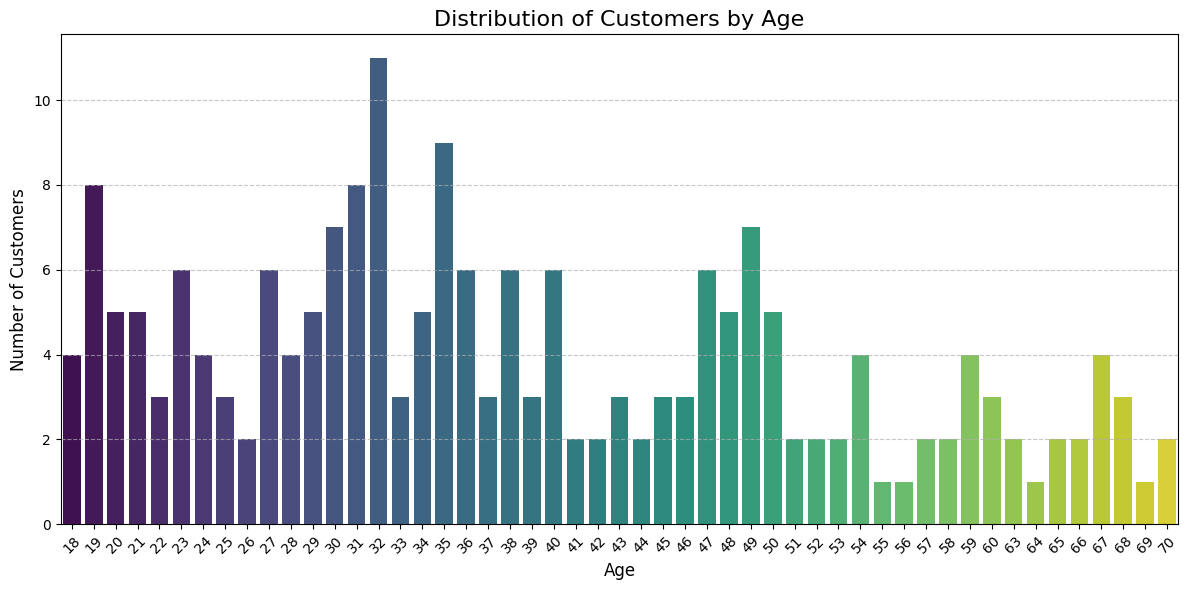

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Age", palette="viridis")
plt.title("Distribution of Customers by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

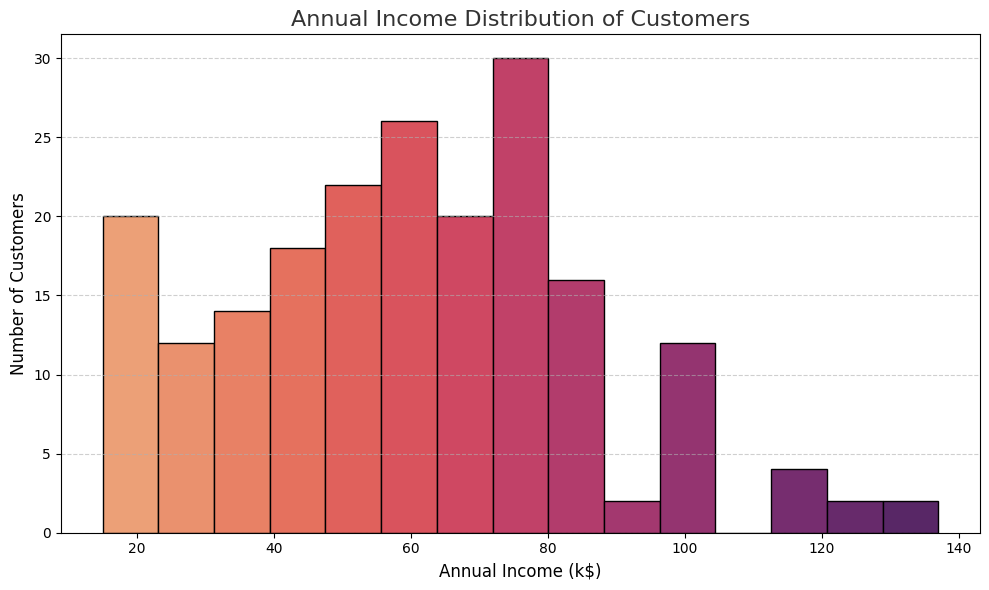

In [50]:
colors = sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(10, 6))
# Changed 'Annual Income' to 'Annual Income (k$)' to match the actual column name
n, bins, patches = plt.hist(df["Annual Income (k$)"], bins=15, edgecolor='black')

for patch, color in zip(patches, sns.color_palette("flare", len(patches))):
    patch.set_facecolor(color)

plt.title("Annual Income Distribution of Customers", fontsize=16, color='#333333')
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-51-c7ac7e5f9d45>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=income_bins, palette="crest")


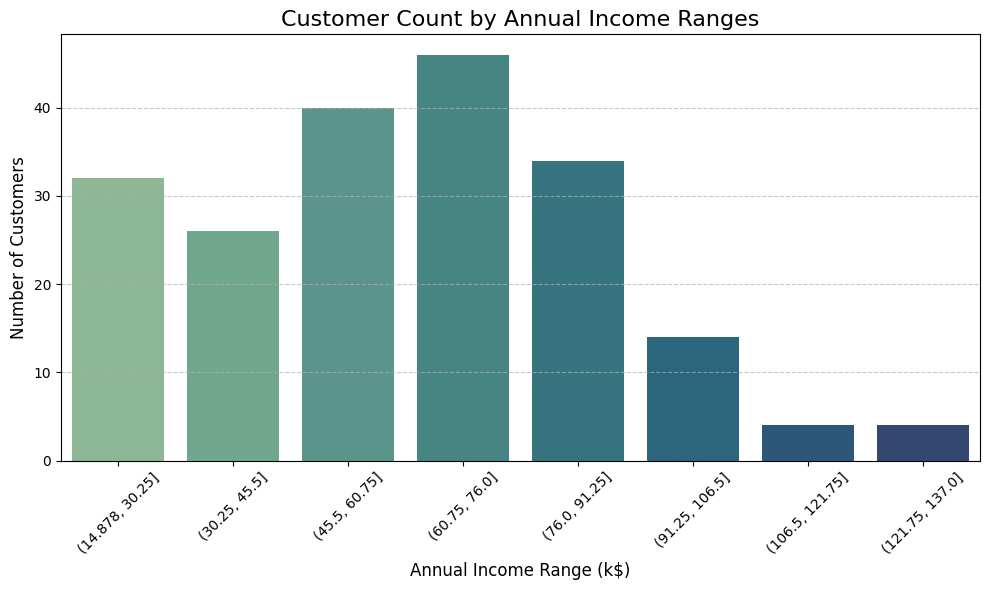

In [51]:
income_bins = pd.cut(df["Annual Income (k$)"], bins=8)

plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins, palette="crest")

plt.title("Customer Count by Annual Income Ranges", fontsize=16)
plt.xlabel("Annual Income Range (k$)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [53]:
df2 = df[["Spending Score (1-100)","Annual Income (k$)","Age"]].mean()
print(df2)

Spending Score (1-100)    50.20
Annual Income (k$)        60.56
Age                       38.85
dtype: float64


In [54]:
column1 = df["Age"]
column2 = df["Annual Income (k$)"]
column3 = df["Spending Score (1-100)"]
max_value1 = column1.max()
max_value2 = column2.max()
max_value3 = column3.max()
print(max_value1)
print(max_value2)
print(max_value3)

70
137
99


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

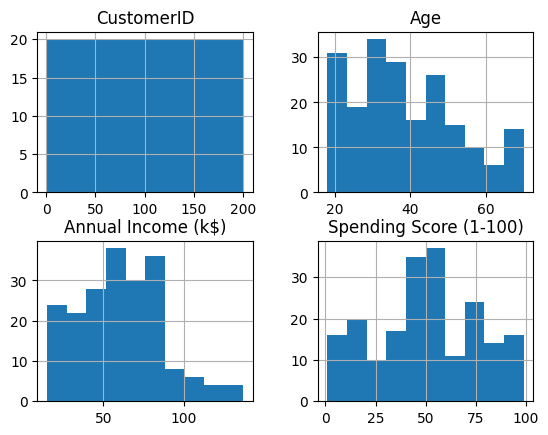

In [55]:
df.hist()

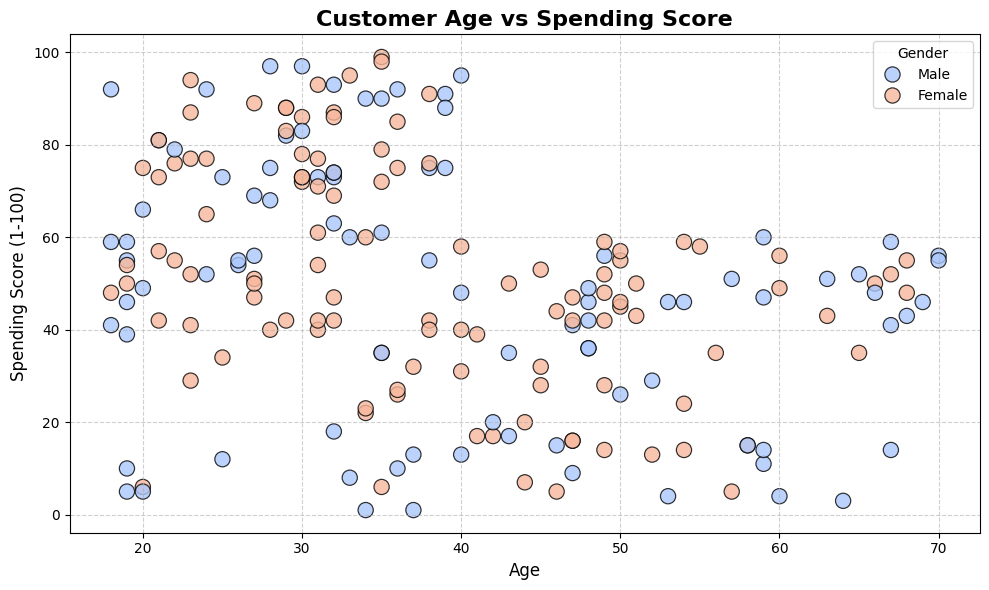

In [57]:
# Bivariate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Genre', palette='coolwarm', s=120, edgecolor='black', alpha=0.8)

plt.title('Customer Age vs Spending Score', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

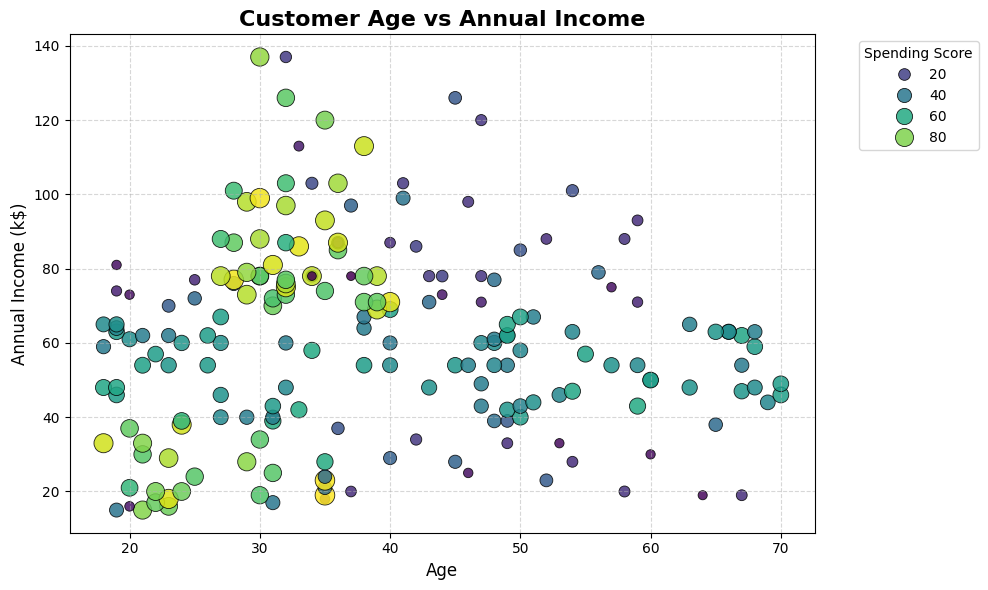

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    hue='Spending Score (1-100)',
    palette='viridis',
    size='Spending Score (1-100)',
    sizes=(40, 200),
    alpha=0.85,
    edgecolor='black'
)

plt.title("Customer Age vs Annual Income", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Spending Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

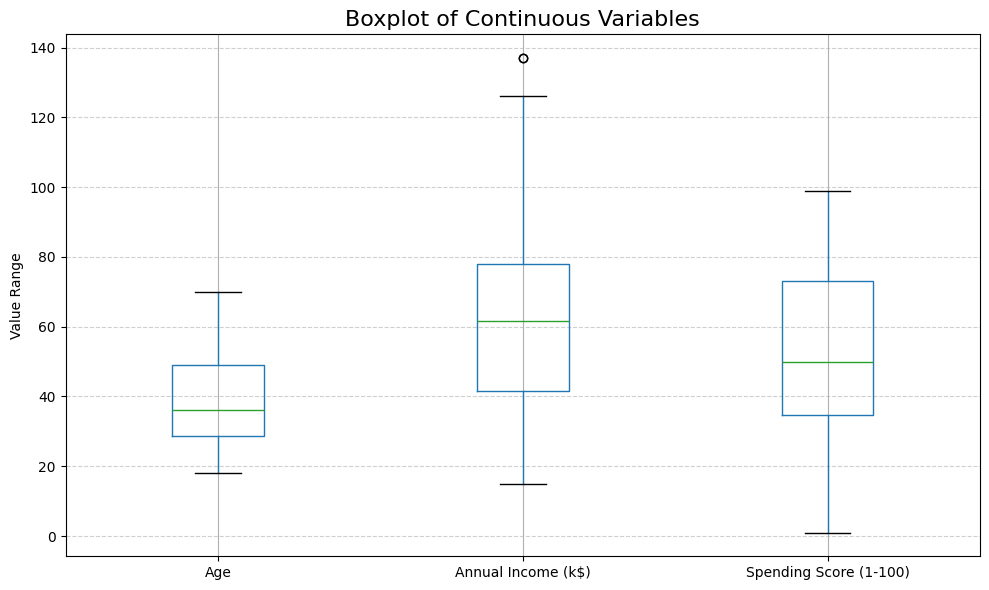

In [59]:
# Discrete and Continuous
plt.figure(figsize=(10, 6))
df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].boxplot()
plt.title("Boxplot of Continuous Variables", fontsize=16)
plt.ylabel("Value Range")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: >

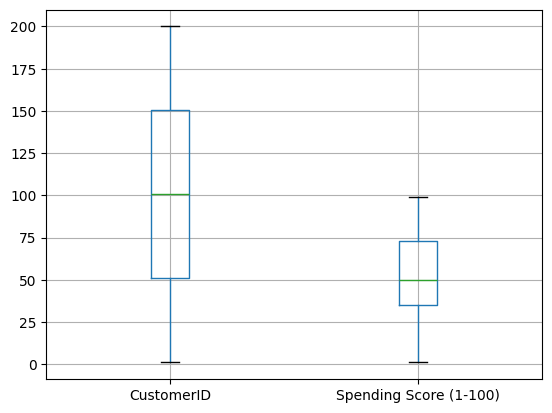

In [60]:
df.boxplot(["CustomerID","Spending Score (1-100)"])

<function matplotlib.pyplot.show(close=None, block=None)>

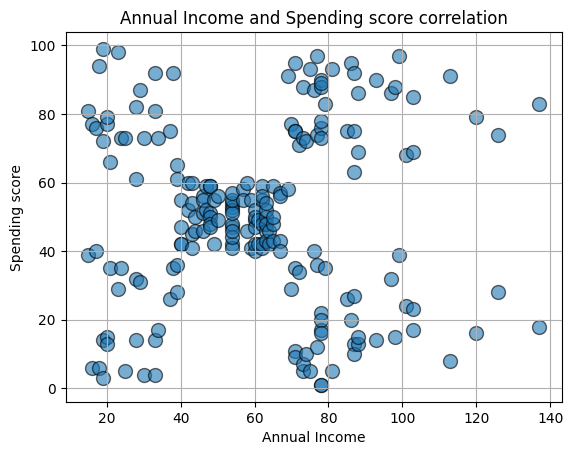

In [61]:
plt.plot(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

In [62]:
X = df.iloc[ : , 3:].values
print(X[:10], "\n\n")
print(X[-10:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] 


[[103  23]
 [103  69]
 [113   8]
 [113  91]
 [120  16]
 [120  79]
 [126  28]
 [126  74]
 [137  18]
 [137  83]]


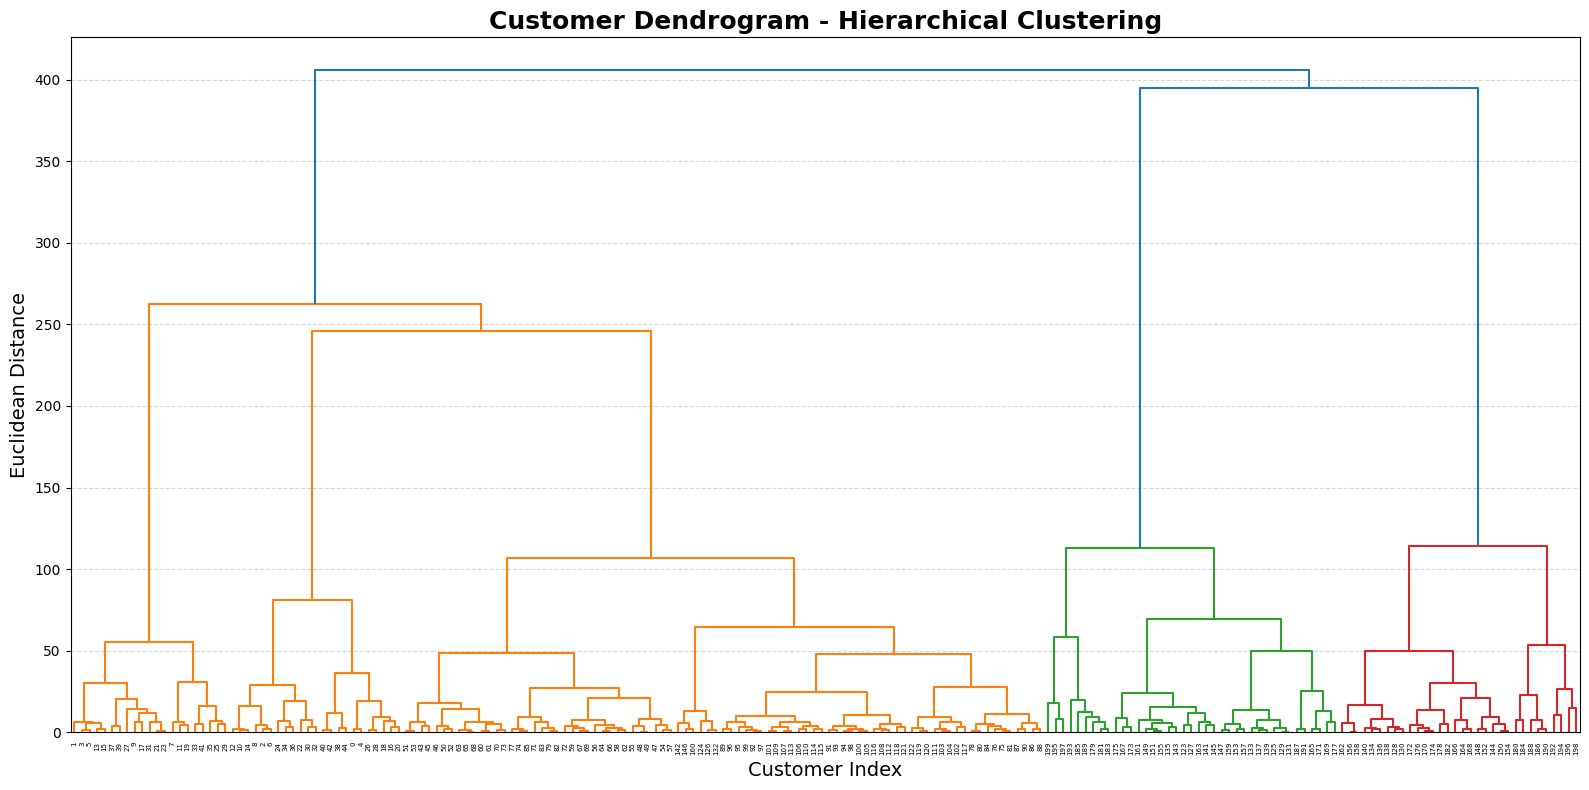

In [63]:
plt.figure(figsize=(16, 8))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Customer Dendrogram - Hierarchical Clustering", fontsize=18, fontweight='bold')
plt.xlabel("Customer Index", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

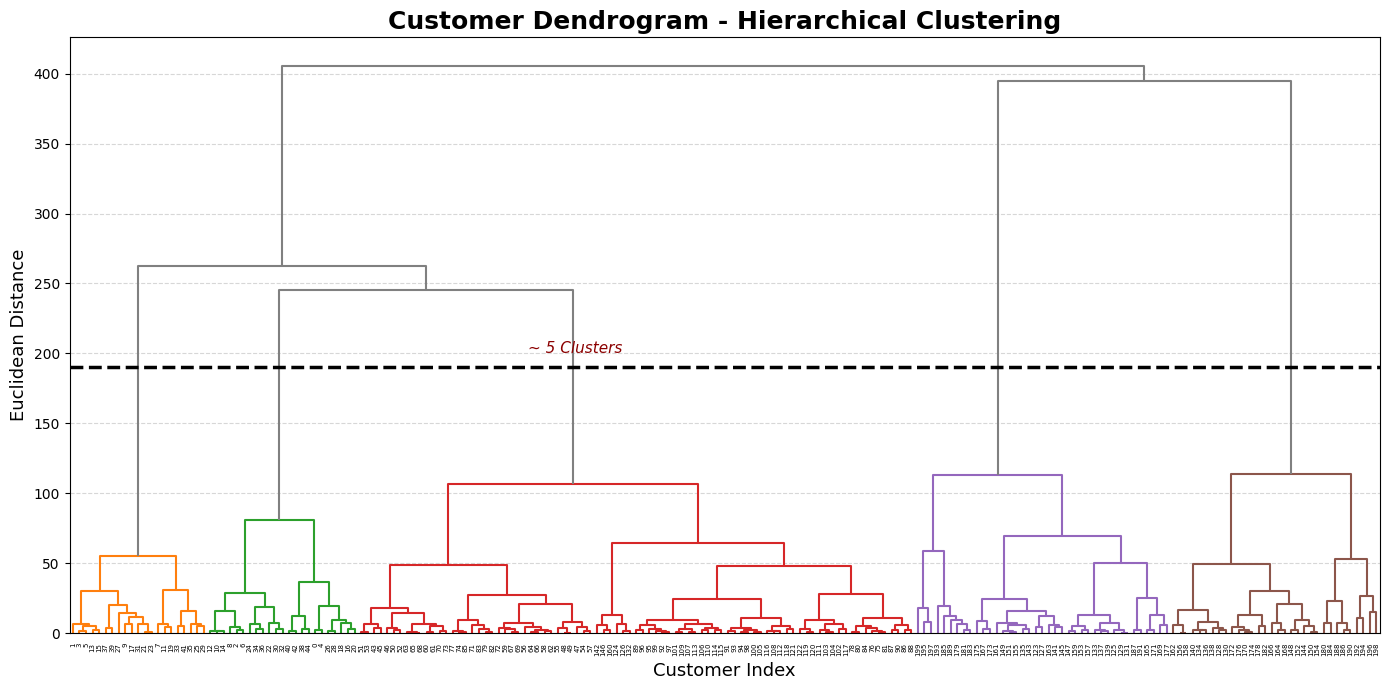

In [64]:

plt.figure(figsize=(14, 7))
dendro = sch.dendrogram(
    sch.linkage(X, method='ward'),
    color_threshold=190,
    above_threshold_color='grey',
    orientation='top'
)

# Customizations
plt.title("Customer Dendrogram - Hierarchical Clustering", fontsize=18, fontweight='bold')
plt.xlabel("Customer Index", fontsize=13)
plt.ylabel("Euclidean Distance", fontsize=13)

# Dashed line to show optimal number of clusters
plt.hlines(y=190, xmin=0, xmax=2000, lw=2.5, linestyles="--", color='black')
plt.text(x=700, y=200, s="~ 5 Clusters", fontsize=11, fontstyle='italic', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering
# The 'affinity' argument is deprecated. Use 'metric' instead.
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [66]:
print("X: ", X[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


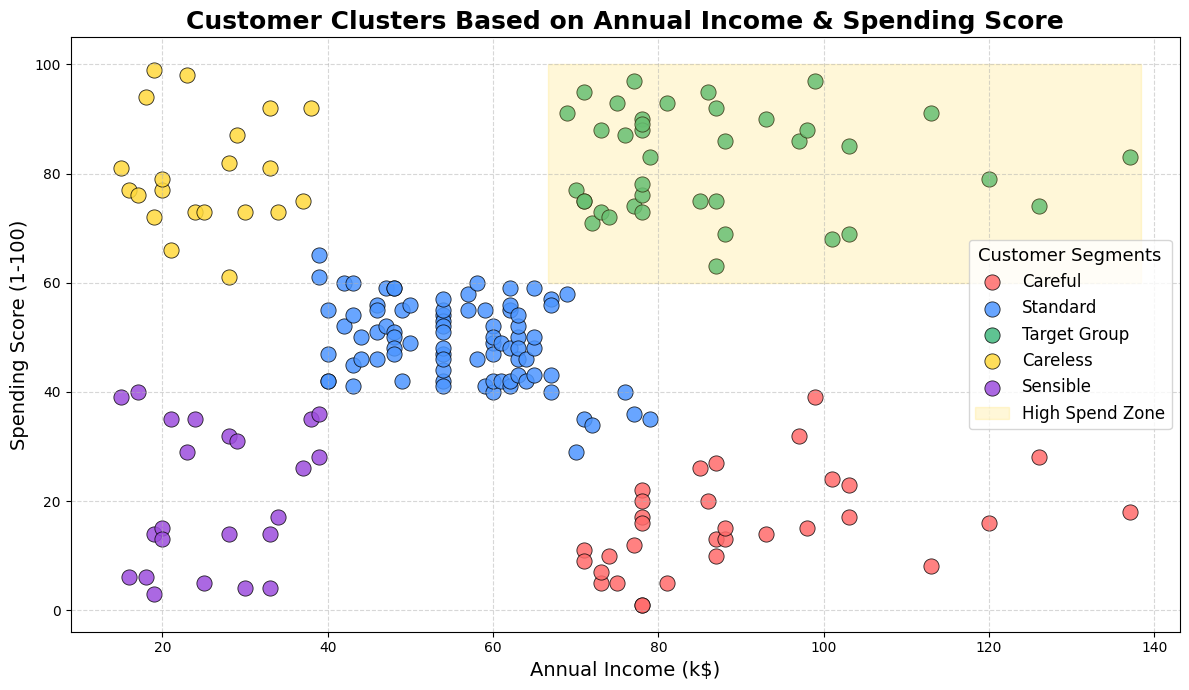

In [67]:
colors = ['#FF6B6B', '#4D96FF', '#43B97F', '#FFD93D', '#9D4EDD']
labels = ['Careful', 'Standard', 'Target Group', 'Careless', 'Sensible']

plt.figure(figsize=(12, 7))
for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1],
                s=120, c=colors[i], edgecolor='black',
                label=labels[i], alpha=0.85, linewidth=0.6)
plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965,
            alpha=0.2, color="#FFD93D", label="High Spend Zone")
plt.title("Customer Clusters Based on Annual Income & Spending Score", fontsize=18, fontweight='bold')
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("Spending Score (1-100)", fontsize=14)
plt.legend(title="Customer Segments", fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()